In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ds = pd.read_csv("train.csv")

In [3]:
ds.head(800)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


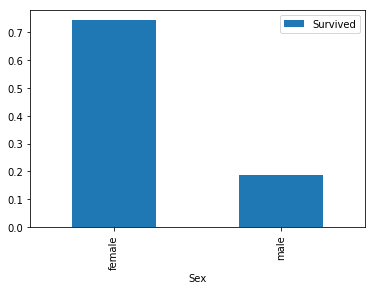

In [4]:
sex= ds.pivot_table(index="Sex",values="Survived")
sex.plot.bar()
plt.show()

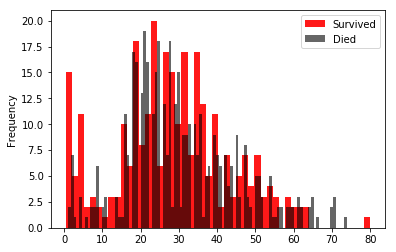

In [31]:
survived = ds[ds["Survived"] == 1]
died = ds[ds["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.9,color='red',bins=50)
died["Age"].plot.hist(alpha=0.6,color='black',bins=25)
plt.legend(['Survived','Died'])
plt.show()

In [6]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 8 , 8 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

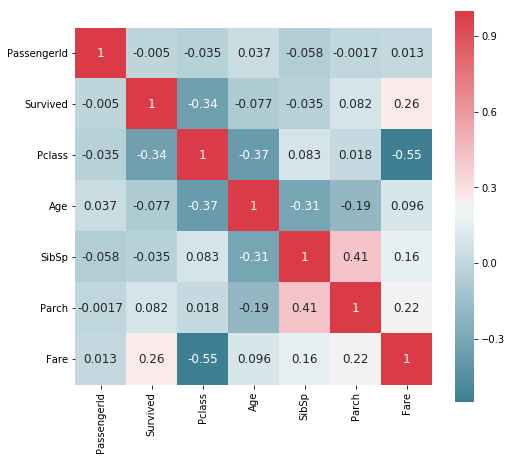

In [7]:
plot_correlation_map( ds )

In [8]:
def get_it(ch):
    pos1=ch.find(',')
    pos2=ch.find('.')
    ch2=ch[pos1+1:pos2]
    return ch2

In [21]:
l=[]
for i in ds["Name"]:
    i=get_it(i)
    l.append(i)

In [10]:
ds.Name=l

In [11]:
ds.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C


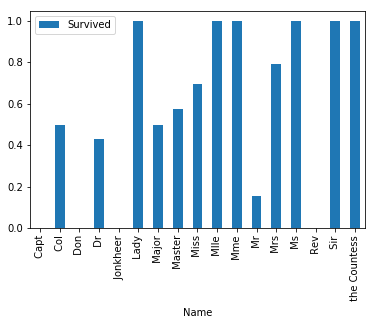

In [12]:
sex= ds.pivot_table(index="Name",values="Survived")
sex.plot.bar()
plt.show()

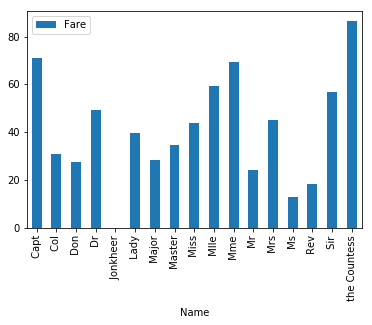

In [13]:
sex= ds.pivot_table(index="Name",values="Fare")
sex.plot.bar()
plt.show()

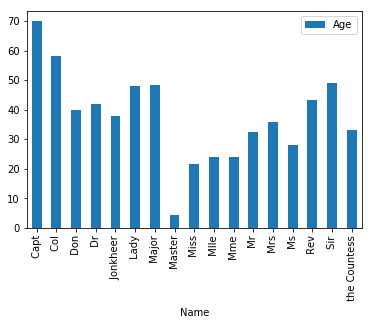

In [14]:
sex= ds.pivot_table(index="Name",values="Age")
sex.plot.bar()
plt.show()

In [15]:
def replace_it(i,l2):
    if i in [' dr',' Col',' Major',' Rev']:
        l2.append('Officer')
    elif i in [' the Countess', ' don', ' sir',' dona',' lady','Jonkheer']:
        l2.append('Royalty')
    elif i in [' Mlle', ' Miss']:
        l2.append('Miss')
    elif i in [' Ms',' Mrs',' Mme']:
        l2.append('Mrs')
    else:
        l2.append(i)

    return (l2)
    

In [16]:
l2=[]
for i in ds["Name"]:
    replace_it(i,l2)

In [17]:
ds["Name"]=l2

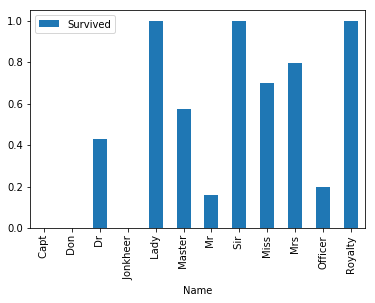

In [18]:
Name= ds.pivot_table(index="Name",values="Survived")
Name.plot.bar()
plt.show()

In [19]:
ds["family"]=ds["SibSp"]+ds["Parch"]

In [20]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,0
